In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('train.csv')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
import pandas as pd

# 날짜 형식 변환
# pd.to_datetime: 문자열 형식의 날짜를 datetime으로 반환
# format='%d/%m/%Y': 입력되는 날짜 문자열의 형식을 지정

df['Date2'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# 날짜 오름차순 정렬(sort)
# 내림차순으로 정렬하고 싶으면 (sorted)

df = df.sort_values(by='Date2')

# 연도 칼럼 생성
df['Year'] = df['Date2'].dt.year

# 선 그래프용 데이터셋 생성
# 2018년 데이터만 필터링
df_line = df[df['Year'] == 2018]

# 2018년 일별 매출액 가공
df_line = df_line.groupby('Date2')['Sales'].sum().reset_index()

df_line.head()


,Date2,Sales
0,2018-01-01,1481.828
1,2018-01-02,2079.554
2,2018-01-03,2070.272
3,2018-01-06,33.740
4,2018-01-07,3395.590


<Axes: xlabel='Date2'>

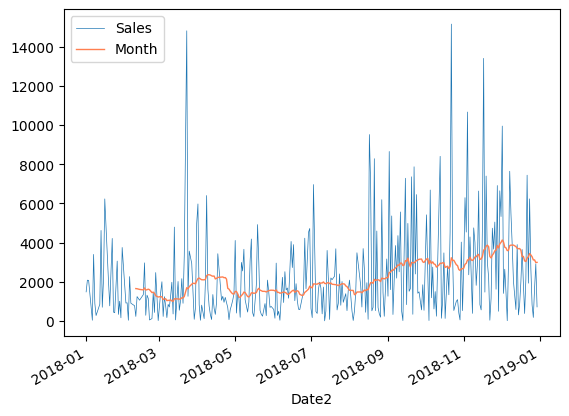

In [9]:
#30일 이동평균 생성

df_line['Month'] = df_line['Sales'].rolling(window=30).mean()

#선 그래프 시각화
ax= df_line.plot(x='Date2', y='Sales',linewidth = '0.5')
df_line.plot(x='Date2', y='Month', color='#FF7F50',linewidth='1',ax=ax)